#Code for HADDOCK 2.4 Docking Analysis

##DNA Strand renaming for Haddock
=> better AlphaFold3 prediction when two DNA strands/ chain IDs => HADDOCK is only allowing docking when both DNA strands have the same Chain ID

In [ ]:
pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.2 MB/s eta 0:00:00


####len of DNA default

In [ ]:
len_of_DNA=33

###for Pdb Files

In [ ]:
from Bio.PDB import PDBParser, PDBIO

# Load the PDB file
pdb_file = "/content/fold_lac_operator_dna_hybrid_model_0.cif"
parser = PDBParser(QUIET=True)
structure = parser.get_structure("structure", pdb_file)

# Set the new residue numbering starting from 34 (after chain A's residue 33)
chain_b_new_start = len_of_DNA+1

# Loop through the structure and update residue numbers for chain B
for model in structure:
    for chain in model:
        if chain.id == "B":  # Update only for chain B
            for residue in chain:
                old_resnum = residue.id[1]
                new_resnum = old_resnum + (chain_b_new_start - 1)
                residue.id = (residue.id[0], new_resnum, residue.id[2])

# Save the updated structure to a new PDB file
output_file = "fold_primer_seq_hybrid_update.pdb"
io = PDBIO()
io.set_structure(structure)
io.save(output_file)

print(f"Updated PDB saved as {output_file}")

Updated PDB saved as fold_primer_seq_hybrid_update.pdb


### for Cif Files

In [ ]:
from Bio.PDB import MMCIFParser, PDBIO
import os

# Load the CIF file
cif_file = "/content/fold_reverse_sub_60_90_model_0.cif"
parser = MMCIFParser(QUIET=True)
structure = parser.get_structure("structure", cif_file)

# Define the new residue numbering starting point
len_of_DNA = 30  # Change this as needed
chain_b_new_start = len_of_DNA + 1

# Update residue numbers for chain B
for model in structure:
    for chain in model:
        if chain.id == "B":
            for residue in chain:
                old_resnum = residue.id[1]
                new_resnum = old_resnum + (chain_b_new_start - 1)
                residue.id = (residue.id[0], new_resnum, residue.id[2])

# Generate output filename dynamically
base_name = os.path.basename(cif_file).replace("fold_", "").replace(".cif", "")
output_file = f"update_{base_name}.pdb"

# Save the updated structure to a new PDB file
io = PDBIO()
io.set_structure(structure)
io.save(output_file)

print(f"Updated PDB saved as {output_file}")


Updated PDB saved as update_reverse_sub_60_90_model_0.pdb


##Haddock Docking Analysis

=> HADDOCK Job Name = Protein_AssayDirection+Substrate_start_end:<br>

For DNA Sequences see Figure below <br>


Substrate:<br>
Sso7d_sub_45_75 for DNA <br>

Sso7d_hsub_45_75 for DNA/RNA hybrid <br>

Sso7d_rsub_45_75 for RNA




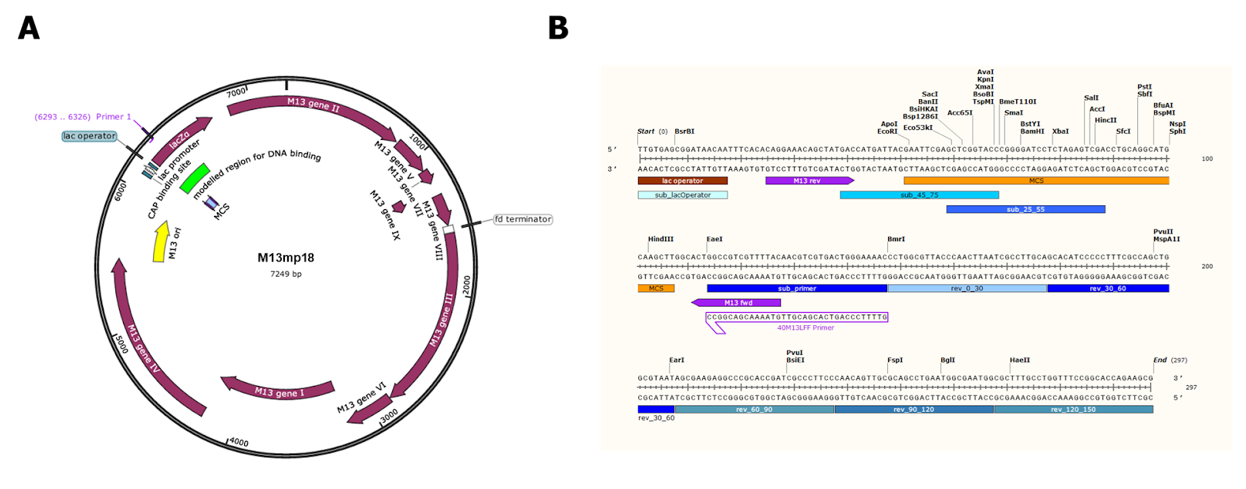

Figure: DNA Sequences Selected for Modeling DNA Binding of Investigated Processivity Factors and Sso7d.
A. Feature map of the complete M13mp18 phage DNA (used as the substrate in the processivity assay), with the region targeted for DNA binding modeling of the investigated proteins highlighted in light green.
B. A detailed view of the selected region, including DNA feature annotations and the individual sequences used for modeling, colored in varying shades of blue.

In [1]:
name="hybrid_analysis"

###Extracting Text from Pdf File and soring it in a csv File

=> all HADDOCK Result Pages were safed as pdf files and the ext was extracted with the following code

####single file

In [2]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00


In [3]:
#import PyPDF2

#with open('/content/drive/MyDrive/SSO7d HADDOCK/Sso7d_sub_lacOperator.pdf', 'rb') as pdf_file:
    #reader = PyPDF2.PdfReader(pdf_file)

    #for page in reader.pages:
        #print(page.extract_text())

###For a Folder

####Extracting Cluster and Structure information

In [4]:
import os
import re
import pandas as pd
from PyPDF2 import PdfReader

folder_path = "/content/drive/MyDrive/FP5_Haddock_new_res"  # Change this to your actual folder path

data = []

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    reader = PdfReader(pdf_path)
    text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path) and filename.lower().endswith(".pdf"):
        print(f"Processing: {filename}")

        content = extract_text_from_pdf(file_path)

        if not content.strip():
            print(f"Warning: No text extracted from {filename}")
            continue  # Skip empty PDFs

        # Extract job name
        job_match = re.search(r'HADDOCK server status for job "([^"]+)"', content)
        job_name = job_match.group(1) if job_match else filename  # Use filename as fallback

        # Extract number of structures and clusters
        structure_match = re.search(r'HADDOCK clustered\s+(\d+)\s+structures in\s+(\d+)\s+cluster', content)
        num_structures = int(structure_match.group(1)) if structure_match else None
        num_clusters = int(structure_match.group(2)) if structure_match else None

        # Append even if some values are missing
        data.append({"Job name": job_name, "Structures": num_structures, "Clusters": num_clusters})

df_clusters = pd.DataFrame(data)

#print(df_clusters_FP3_Zn)


Processing: FP5_rev_120_150.pdf
Processing: FP5_rev_90_120.pdf
Processing: FP5_rev_60_90.pdf
Processing: FP5_rev_30_60.pdf
Processing: FP5_rev_0_30.pdf
Processing: FP5_sub_primer.pdf
Processing: FP5_sub_25_55.pdf
Processing: FP5_sub_45_75.pdf
Processing: FP5_sub_lacOperator.pdf


#####Exporting df

In [5]:
df_clusters.to_csv("/content/drive/MyDrive/FP5_hybrid_result/GGPGGPGG_cluster_analysis.csv")

###Loading results from multiple dockings

In [6]:
import pandas as pd

# List of file paths
paths = [
    "/content/drive/MyDrive/FP5_hybrid_result/GGPGGPGG_cluster_analysis.csv",
    #"/content/drive/MyDrive/all_FP3_Zn_dockings.csv",
    #"/content/drive/MyDrive/4G_2EAAAK_4G/4xG2xEAAAK4xG_cluster_analysis.csv",
    #"/content/drive/MyDrive/all_FP3_dockings.csv"
]

# Read and concatenate all CSV files
dataframes = [pd.read_csv(path) for path in paths]
cluster_complete = pd.concat(dataframes, ignore_index=True)


In [7]:
cluster_complete

,Unnamed: 0,Job name,Structures,Clusters
0,0,FP5_rev_120_150,130,12
1,1,FP5_rev_90_120,116,17
2,2,FP5_rev_60_90,110,13
3,3,FP5_rev_30_60,122,13
4,4,FP5_rev_0_30,156,13
5,5,FP5_sub_primer,80,12
6,6,FP5_sub_25_55,112,12
7,7,FP5_sub_45_75,114,13
8,8,FP5_sub_lacOperator,86,12


####Adding Substrate Information

In [8]:
import pandas as pd

# Example DataFrame


# Function to determine nucleic acid type
def determine_nuc_acid(job_name):
    parts = job_name.split('_')
    if len(parts) > 1 and parts[1] in ['hsub', 'hrev', 'h-rev']:
        return 'Hybrid'
    elif len(parts) > 1 and parts[1] in ['rsub', 'rrev', 'r-rev']:
      return 'RNA'
    else:
      return 'DNA'

# Add new column
cluster_complete['nuc_acid'] = cluster_complete['Job name'].apply(determine_nuc_acid)

print(cluster_complete)


   Unnamed: 0             Job name  Structures  Clusters nuc_acid
0           0      FP5_rev_120_150         130        12      DNA
1           1       FP5_rev_90_120         116        17      DNA
2           2        FP5_rev_60_90         110        13      DNA
3           3        FP5_rev_30_60         122        13      DNA
4           4         FP5_rev_0_30         156        13      DNA
5           5       FP5_sub_primer          80        12      DNA
6           6        FP5_sub_25_55         112        12      DNA
7           7        FP5_sub_45_75         114        13      DNA
8           8  FP5_sub_lacOperator          86        12      DNA


####adding manual result if extraction doesnt work

In [9]:
# Manually adding a row
new_row = {
    "Job name": "GGPGPGG_rev_120_150",  # Cluster number
    "Structures": 79,
    "Clusters": 12,

}

# Adding the row at the end of the DataFrame
cluster_complete.loc[len(cluster_complete)] = new_row

####changing Filename

In [10]:
import os

# Path to the file
folder_path = "/content/drive/MyDrive/FP5_Tandem_Haddock_csv_complete"  # Adjust path as needed
old_filename = os.path.join(folder_path, "FP5_2xGGEAAAK_linker.csv")
new_filename = os.path.join(folder_path, "FP5_4xG-2xEAAAK-4xG_linker.csv")

# Rename the file
#os.rename(old_filename, new_filename)



###Extracting Informations from the Index

In [11]:
cluster_complete["Protein"]=cluster_complete["Job name"].str.split("_").str[0]
cluster_complete["Sequence"] = cluster_complete["Job name"].str.split("_").str[1:]
cluster_complete.drop(columns=["Unnamed: 0"],inplace=True)


In [12]:
cluster_complete["Sequence"] = cluster_complete["Sequence"].apply(lambda x: "_".join(map(str, x)))
cluster_complete['Sequence'] = cluster_complete['Sequence'].str.replace(".pdf", "", regex=False)
cluster_complete["Sequence"] = cluster_complete["Sequence"].str.replace("h", "", regex=False)
cluster_complete["Sequence"] = cluster_complete["Sequence"].str.replace("-", "", regex=False)


####Extracting Direction/ DNA Sequence

In [13]:
#complete_cluster["Protein"] = complete_cluster["Protein"].replace({
 #   "FP3-\nZn": "FP3-Zn",  # Fixing line break issue
 #   "Fp3-Zn": "FP3-Zn"      # Fixing inconsistent capitalization
#})


In [14]:

cluster_complete["Sequence"] = cluster_complete["Sequence"].replace({
    "lacOperator": "sub_lacOperator",  # Fixing line break issue
    "sub_25-55": "sub_25_55",
    "sub_45-75":"sub_45_75"# Fixing inconsistent capitalization
})


len(cluster_complete["Sequence"].unique())

9

In [15]:
cluster_complete["Protein"].replace({"4xG2xEAAAK4xG":"4xG-2xEAAAK-4xG"},inplace=True)
#

<ipython-input-15-33dc12f17173>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_complete["Protein"].replace({"4xG2xEAAAK4xG":"4xG-2xEAAAK-4xG"},inplace=True)


###setting Custom Order

In [16]:
from pandas.api.types import CategoricalDtype

custom_order = ["rev_120_150", "rev_90_120", "rev_60_90", "rev_30_60", "rev_0_30","sub_primer","sub_25_55","sub_45_75","sub_lacOperator"]  # Replace with your actual order

# Convert the 'Sequence' column to categorical with the custom order
cluster_complete["Sequence"] = cluster_complete["Sequence"].astype(CategoricalDtype(categories=custom_order, ordered=True))

# Sort the DataFrame based on this order<
cluster_complete = cluster_complete.sort_values("Sequence")

###Plotting Strucutre and Cluster Number per Sequence

In [17]:
import plotly.graph_objects as go
import pandas as pd
from pandas.api.types import CategoricalDtype


# Sample DataFrame (Replace with your actual data)
df=cluster_complete


custom_order = ["rev_120_150", "rev_90_120", "rev_60_90", "rev_30_60", "rev_0_30","sub_primer","sub_25_55","sub_45_75","sub_lacOperator"]  # Replace with your actual order

# Convert the 'Sequence' column to categorical with the custom order
df["Sequence"] = df["Sequence"].astype(CategoricalDtype(categories=custom_order, ordered=True))

# Sort the DataFrame based on this order
df = df.sort_values("Sequence")
# Sample DataFrame

# Sort by Protein and Sequence for better visualization
df = df.sort_values(by=["Sequence", "nuc_acid"])

# Define colors for each Protein
protein_colors = {"FP5": "#F38181", "FP3": "#C14600", "FP3-Zn":"#FF9D23", "Sso7d":"#BFBBA9",'GGPGPGG':"#D98324",'GGPGGPGG':"#A0C878", '4xeaaak':"#FFC1B4", '10G':"#EAD196", '16G':"#BF3131",'4xG-2xEAAAK-4xG':"#71BBB2", "Hybrid":"#F38C79", "DNA":"#007074" }

# Create figure
fig = go.Figure()

# Add bar traces for each Protein
for protein, color in protein_colors.items():
    df_subset = df[df["nuc_acid"] == protein]
    fig.add_trace(go.Bar(
        x=df_subset["Sequence"],
        y=df_subset["Structures"],
        name=f"Structures ({protein})",
        marker=dict(color=color),
        text=df_subset["Structures"],
        textposition="auto",
        opacity=0.7
    ))

# Add scatter traces for Clusters (one per Protein)
for protein, color in protein_colors.items():
    df_subset = df[df["nuc_acid"] == protein]
    fig.add_trace(go.Scatter(
        x=df_subset["Sequence"],
        y=df_subset["Clusters"],
        name=f"Clusters ({protein})",
        mode="lines+markers",
        yaxis="y2",  # Assign to secondary y-axis
        marker=dict(color=color, symbol="circle",size=14,opacity=0.8),
        line=dict(dash="dot")  # Dashed line for differentiation
    ))

# Update layout
fig.update_layout(
    title="<b>Structures vs. Clusters (Grouped by Linker)</b>",
    xaxis=dict(title="DNA Sequence", tickangle=-45),  # Rotate x-axis labels
    yaxis=dict(title="Structures", side="left"),
    yaxis2=dict(
        title="Clusters",
        overlaying="y",
        side="right",
        showgrid=False,


    ),
    #legend=dict(x=1, y=1),
    barmode="group",  # Group bars by Protein
    width=1000,
    height=600,
    font=dict(size=18, family="Tahoma", color="black"),
    showlegend=True,
    template="simple_white",
)

# Show figure
fig.show()



###Extracting Energy Data from the Pdf

> Blockzitat einfügen



In [18]:
import os
import re
import pandas as pd
from PyPDF2 import PdfReader

# Folders
input_folder = "/content/drive/MyDrive/FP5_Haddock_new_res"  # Update with your input folder
output_folder = "/content/HADDOCK_hybrid"  # Output folder

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    reader = PdfReader(pdf_path)
    text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

def clean_text(text):
    """Fix broken words and remove extra spaces."""
    text = re.sub(r"\s+", " ", text)  # Normalize spaces
    text = re.sub(r"Van der W aals", "Van der Waals", text)
    text = re.sub(r"lowest -energy", "lowest-energy", text)
    text = re.sub(r"Desolv ation", "Desolvation", text)
    text = re.sub(r"Restraints violation", "Restraints Violation", text)
    return text

def extract_job_name(text):
    """Extract job name from HADDOCK results."""
    match = re.search(r'HADDOCK server status for job\s+"([^"]+)"', text)
    return match.group(1) if match else "unknown_job"

def extract_value(pattern, text, label):
    """Extracts a single value from the text based on a regex pattern."""
    match = re.search(pattern, text)
    if match:
        print(f"{label}: {match.group(1)}")  # Debug print
        return float(match.group(1)) if "." in match.group(1) else int(match.group(1))
    print(f"{label}: Not found")
    return None

def extract_cluster_data(text):
    """Extracts each HADDOCK parameter separately."""
    text = clean_text(text)  # Normalize text

    clusters = re.findall(r"Cluster\s+(\d+)", text)  # Extract cluster numbers
    data = []

    for cluster in clusters:
        cluster_text = text[text.find(f"Cluster {cluster}"):]  # Extract relevant part of text

        row = {
            "Cluster": int(cluster),
            "HADDOCK Score": extract_value(r"HADDOCK score\s+(-?\d+\.\d+)", cluster_text, "HADDOCK Score"),
            "Cluster Size": extract_value(r"Cluster siz e\s+(\d+)", cluster_text, "Cluster Size"),
            "RMSD": extract_value(r"lowest-energy structure\s+(-?\d+\.\d+)", cluster_text, "RMSD"),
            "Van der Waals Energy": extract_value(r"Van der Waals energy\s+(-?\d+\.\d+)", cluster_text, "Van der Waals Energy"),
            "Electrostatic Energy": extract_value(r"Electrostatic energy\s+(-?\d+\.\d+)", cluster_text, "Electrostatic Energy"),
            "Desolvation Energy": extract_value(r"Desolvation energy\s+(-?\d+\.\d+)", cluster_text, "Desolvation Energy"),
            "Restraints Violation Energy": extract_value(r"Restraints Violation energy\s+(-?\d+\.\d+)", cluster_text, "Restraints Violation Energy "),
            "Buried Surface Area": extract_value(r"Buried Surface Area\s+(-?\d+\.\d+)", cluster_text, "Buried Surface Area"),
            "Z-Score": extract_value(r"Z-Score\s+(-?\d+\.\d+)", cluster_text, "Z-Score"),
        }

        data.append(row)

    return pd.DataFrame(data)

# Loop through all PDF files in the folder
for file in os.listdir(input_folder):
    if file.endswith(".pdf"):
        pdf_path = os.path.join(input_folder, file)

        # Extract text
        pdf_text = extract_text_from_pdf(pdf_path)

        # Extract job name
        job_name = extract_job_name(pdf_text)

        # Extract cluster data
        df = extract_cluster_data(pdf_text)

        # Save if valid data exists
        if not df.empty:
            output_filename = os.path.join(output_folder, f"{job_name}.csv")
            df.to_csv(output_filename, index=False)
            print(f"Saved: {output_filename}")
        else:
            print(f"No valid data in: {file}")


HADDOCK Score: -90.2
Cluster Size: 20
RMSD: Not found
Van der Waals Energy: -71.8
Electrostatic Energy: -563.2
Desolvation Energy: 27.0
Restraints Violation Energy : 671.6
Buried Surface Area: 2380.4
Z-Score: -1.6
HADDOCK Score: -89.9
Cluster Size: 44
RMSD: Not found
Van der Waals Energy: -65.7
Electrostatic Energy: -550.7
Desolvation Energy: 22.9
Restraints Violation Energy : 629.7
Buried Surface Area: 2399.9
Z-Score: -1.5
HADDOCK Score: -72.3
Cluster Size: 11
RMSD: Not found
Van der Waals Energy: -64.1
Electrostatic Energy: -565.3
Desolvation Energy: 24.0
Restraints Violation Energy : 809.1
Buried Surface Area: 2208.8
Z-Score: -0.4
HADDOCK Score: -70.1
Cluster Size: 7
RMSD: Not found
Van der Waals Energy: -58.9
Electrostatic Energy: -519.9
Desolvation Energy: 24.3
Restraints Violation Energy : 685.0
Buried Surface Area: 2263.7
Z-Score: -0.2
HADDOCK Score: -66.8
Cluster Size: 4
RMSD: Not found
Van der Waals Energy: -69.5
Electrostatic Energy: -556.5
Desolvation Energy: 25.0
Restraints

##Plotting the Result

In [19]:
import pandas as pd
import glob
import os

# Define the folder path
folder_path = "/content/HADDOCK_hybrid"  # Change this to your actual folder path

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs, adding a filename column
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df["filename"] = os.path.basename(file)  # Add filename as a new column
    df_list.append(df)

# Concatenate all DataFrames into one
df_final1 = pd.concat(df_list, ignore_index=True)

# Display the final merged DataFrame
print(df_final1["filename"].unique())


['FP5_rev_60_90.csv' 'FP5_sub_lacOperator.csv' 'FP5_rev_90_120.csv'
 'FP5_rev_0_30.csv' 'FP5_rev_30_60.csv' 'FP5_sub_primer.csv'
 'FP5_rev_120_150.csv' 'FP5_sub_25_55.csv' 'FP5_sub_45_75.csv']


In [20]:
df_final1["protein"]=df_final1["filename"].str.split("_").str[0]


In [21]:
# Extract parts after the first split part and join the next three elements
df_final1["Sequence"] = df_final1["filename"].str.split("_").str[1:4].str.join("_")

# Remove '.csv' extension if present
df_final1["Sequence"] = df_final1["Sequence"].str.replace(".csv", "", regex=False)

# Display result
print(df_final1[["protein", "Sequence"]].drop_duplicates())


   protein         Sequence
0      FP5        rev_60_90
10     FP5  sub_lacOperator
20     FP5       rev_90_120
30     FP5         rev_0_30
40     FP5        rev_30_60
50     FP5       sub_primer
60     FP5      rev_120_150
70     FP5        sub_25_55
80     FP5        sub_45_75


In [22]:
df_final1 = df_final1.rename(columns={
    "Electrostatic Energy": "Electrostatic Energy [kJ/mol]",
    "Restraints Violation Energy": "Restraints Violation Energy [kJ/mol]",
    "Van der Waals Energy": "Van der Waals Energy [kJ/mol]"
})


In [23]:
df_final1.to_csv(f"/content/HADDOCK_hybrid/{name}_Sequence_energy.csv")

###Averaging Energy Values over all Sequences

In [24]:
import plotly.express as px
import pandas as pd

# Define the metrics to plot
metrics = ["HADDOCK Score", "Electrostatic Energy [kJ/mol]", "Van der Waals Energy [kJ/mol]", "Restraints Violation Energy [kJ/mol]"]

# Define custom colors for proteins
colors = {
    "FP5": "#205781", "FP3": "#C14600", "FP3-Zn": "#FF9D23", "Sso7d": "#BFBBA9",
    "GGPGPGG": "#D98324", "GGPGGPGG": "#A0C878", "4xeaaak": "#FFC1B4",
    "10G": "#EAD196", "16G": "#BF3131", "4xG-2xEAAAK-4xG": "#A4ADF8"
}

# Create a box plot for each metric
for metric in metrics:
    fig = px.box(df_final1, x="protein", y=metric, title=f"Box Plot of {metric} by Protein", color="protein",
                 color_discrete_map=colors)
    fig.update_xaxes(tickangle=30, tickfont=dict(size=24,family="Tahoma"))
    fig.update_yaxes(
    tickangle=0,  # Ensures tick labels are not rotated
    tickfont=dict(size=16, family="Tahoma"),  # Font size & family for tick labels
    title_font=dict(size=24, family="Tahoma")  # Font size & family for y-axis title

)  # Use color mapping
    #fig.write_html(f"/content/{metric}_by_protein.html")
    fig.show()


#####Exporting Data Frame

In [25]:
df_final1.to_csv("/content/drive/MyDrive/HADDOCK_linker_second_docking/3_linker_energy.csv")


###Energy Analysis per Sequence and Protein

In [50]:
import pandas as pd

# List of file paths
energy_paths = [
    #f"/content/HADDOCK_hybrid/{name}_Sequence_energy.csv",
    "/content/drive/MyDrive/FP5_Haddock_csv/all_FP5_dockings.csv",
    "/content/drive/MyDrive/all_FP3_dockings.csv",
    "/content/drive/MyDrive/all_FP3_Zn_dockings.csv",

    # Add more paths if needed
]

# Load and concatenate
energy_dataframes = [pd.read_csv(path) for path in energy_paths]
energy_combined = pd.concat(energy_dataframes, ignore_index=True)


In [54]:
energy_combined["protein"]=energy_combined["Filename"].str.split("_").str[0]
energy_combined["Sequence"] = energy_combined["Filename"].str.split("_").str[1:4].str.join("_")
energy_combined["Sequence"] = energy_combined["Sequence"].str.replace(".csv", "", regex=False)

,Unnamed: 0,Cluster,Van der Waals Energy,Electrostatic Energy,Restraints Violation Energy,Filename,Protein,Sequence,Start,End,complete_name,HADDOCK Score,Cluster Size,RMSD,Desolvation Energy,Buried Surface Area,Z-Score,protein
0,0,5,-29.6,-473.5,1349.5,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
1,8,12,-19.7,-407.7,1370.9,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
2,7,11,-22.9,-315.7,1202.2,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
3,6,4,-22.7,-341.2,1227.3,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
4,5,2,-53.8,-156.4,1171.2,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,66,4,-55.8,-510.2,1509.2,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,8.6,5.0,NaN,15.5,2025.4,-1.0,FP3-Zn
225,67,2,-68.0,-396.6,1541.9,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,17.6,6.0,NaN,10.7,2399.5,-0.1,FP3-Zn
226,68,3,-53.6,-400.4,1489.5,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,19.8,5.0,NaN,4.6,2114.8,0.1,FP3-Zn
227,69,6,-53.4,-448.9,1578.4,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,31.5,4.0,NaN,16.8,1877.9,1.2,FP3-Zn


In [56]:
energy_combined["Sequence"].replace({"lacOperator":"sub_lacOperator", "sub_45-75":"sub_45_75","sub_25-55":"sub_25_55"},inplace=True)
energy_combined["protein"].replace({"Fp3-Zn":"FP3-Zn", "FP3-\nZn":"FP3-Zn"},inplace=True)

<ipython-input-56-25a712bb91fc>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-56-25a712bb91fc>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

####exporting Merched Dataframe

In [57]:
energy_combined.drop(columns=["Unnamed: 0"],inplace=True)
energy_combined.to_csv(f"/content/{name}_energy_sequence.csv", index=False)

In [58]:
import pandas as pd
df_final=pd.read_csv(f"/content/{name}_energy_sequence.csv")

In [59]:
df_final=df_final[(df_final["protein"]=="FP5")|(df_final["protein"]=="FP3")|(df_final["protein"]=="FP3-Zn")]

In [60]:
df_final = df_final.rename(columns={
    "Electrostatic Energy": "Electrostatic Energy [kJ/mol]",
    "Restraints Violation Energy": "Restraints Violation Energy [kJ/mol]",
    "Van der Waals Energy": "Van der Waals Energy [kJ/mol]"
})


In [61]:
df_final

,Cluster,Van der Waals Energy [kJ/mol],Electrostatic Energy [kJ/mol],Restraints Violation Energy [kJ/mol],Filename,Protein,Sequence,Start,End,complete_name,HADDOCK Score,Cluster Size,RMSD,Desolvation Energy,Buried Surface Area,Z-Score,protein
0,5,-29.6,-473.5,1349.5,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
1,12,-19.7,-407.7,1370.9,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
2,11,-22.9,-315.7,1202.2,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
3,4,-22.7,-341.2,1227.3,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
4,2,-53.8,-156.4,1171.2,FP5_lacOperator_80_110,FP5,lacOperator_80_110,80.0,110.0,lacOperator_80.0-110.0,NaN,NaN,NaN,NaN,NaN,NaN,FP5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,4,-55.8,-510.2,1509.2,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,8.6,5.0,NaN,15.5,2025.4,-1.0,FP3-Zn
225,2,-68.0,-396.6,1541.9,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,17.6,6.0,NaN,10.7,2399.5,-0.1,FP3-Zn
226,3,-53.6,-400.4,1489.5,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,19.8,5.0,NaN,4.6,2114.8,0.1,FP3-Zn
227,6,-53.4,-448.9,1578.4,FP3-Zn_rev_0_30,NaN,rev_0_30,NaN,NaN,NaN,31.5,4.0,NaN,16.8,1877.9,1.2,FP3-Zn


###Ranking Clusters according to HADDOCK Score

In [62]:
import pandas as pd



# Group by 'Sequence' and 'protein' and assign new cluster numbers
df_final["Ranked_Cluster"] = df_final.groupby(["Sequence", "protein"]).cumcount()+1

# Display the updated DataFrame
print(df_final.head())


   Cluster  Van der Waals Energy [kJ/mol]  Electrostatic Energy [kJ/mol]  \
0        5                          -29.6                         -473.5   
1       12                          -19.7                         -407.7   
2       11                          -22.9                         -315.7   
3        4                          -22.7                         -341.2   
4        2                          -53.8                         -156.4   

   Restraints Violation Energy [kJ/mol]                Filename Protein  \
0                                1349.5  FP5_lacOperator_80_110     FP5   
1                                1370.9  FP5_lacOperator_80_110     FP5   
2                                1202.2  FP5_lacOperator_80_110     FP5   
3                                1227.3  FP5_lacOperator_80_110     FP5   
4                                1171.2  FP5_lacOperator_80_110     FP5   

             Sequence  Start    End           complete_name  HADDOCK Score  \
0  lacOperator

####Adding Substrate Information

In [63]:
import pandas as pd

# Example DataFrame


# Function to determine nucleic acid type
def determine_nuc_acid(job_name):
    parts = job_name.split('_')
    if len(parts) > 1 and parts[0] in ['hsub', 'hrev', 'h-rev']:
        return 'Hybrid'
    return 'DNA'

# Add new column
df_final['nuc_acid'] = df_final['Sequence'].apply(determine_nuc_acid)

#print(df_final)





In [64]:
df_final["Sequence"] = df_final["Sequence"].str.replace("h", "", regex=False)
df_final["Sequence"] = df_final["Sequence"].str.replace("-", "", regex=False)

####Setting Custom Order

In [69]:
from pandas.api.types import CategoricalDtype

custom_order = ["rev_120_150", "rev_90_120", "rev_60_90", "rev_30_60", "rev_0_30","sub_primer","sub_25_55","sub_45_75","sub_lacOperator"]  # Replace with your actual order

# Convert the 'Sequence' column to categorical with the custom order
df_final["Sequence"] = df_final["Sequence"].astype(CategoricalDtype(categories=custom_order, ordered=True))

# Sort the DataFrame based on this order
df_final = df_final.sort_values("Sequence")

###Plotting Energy Values for each Substrate Sequence and Protein

In [71]:
import plotly.express as px
import pandas as pd

# Define the metrics to plot
metrics = ["HADDOCK Score", "Electrostatic Energy [kJ/mol]", "Van der Waals Energy [kJ/mol]", "Restraints Violation Energy [kJ/mol]"]

# Define custom colors for proteins
colors = {
    "FP5": "#F38181", "FP3": "#C14600", "FP3-Zn": "#FF9D23", "Sso7d": "#BFBBA9",
    "GGPGPGG": "#D98324", "GGPGGPGG": "#A0C878", "4xeaaak": "#FFC1B4",
    "10G": "#EAD196", "16G": "#BF3131", "4xG-2xEAAAK-4xG": "#A4ADF8","Hybrid":"#F38C79", "DNA":"#007074"
}

# Create the box plots, grouped by sequence, with separate boxes for each protein
for metric in metrics:

    fig = px.box(df_final, x="Sequence", y=metric, color="protein",
                 #title=f"Box Plot of {metric} by Sequence and Protein",
                 color_discrete_map=colors,notched=True,)

    # Update x-axis and y-axis styles
    fig.update_xaxes(tickangle=45, tickfont=dict(size=18, family="Tahoma"),title_font=dict(size=24, family="Tahoma"))
    fig.update_yaxes(tickangle=0, tickfont=dict(size=18, family="Tahoma"), title_font=dict(size=24, family="Tahoma"))
    fig.update_layout(template="plotly_white")
    # Show the plot
    fig.show()


In [39]:
from pandas.api.types import CategoricalDtype

custom_order = ["rev_120_150", "rev_90_120", "rev_60_90", "rev_30_60", "rev_0_30","sub_primer","sub_25_55","sub_45_75","sub_lacOperator"]  # Replace with your actual order

# Convert the 'Sequence' column to categorical with the custom order
df_final["Sequence"] = df_final["Sequence"].astype(CategoricalDtype(categories=custom_order, ordered=True))

# Sort the DataFrame based on this order
df_final = df_final.sort_values("Sequence")

In [42]:
df_final.to_csv("/content/drive/MyDrive/FP5_Tandem_Haddock_csv_complete/all_linker_dockings_complete")

###Analysing Energy Values within each Sequence

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re

# Define the metrics to plot
metrics = ["HADDOCK Score", "Electrostatic Energy [kJ/mol]",
           "Van der Waals Energy [kJ/mol]", "Restraints Violation Energy [kJ/mol]"]

# Define custom colors for proteins
colors = {
    "FP5": "#F38181", "FP3": "#C14600", "FP3-Zn": "#FF9D23", "Sso7d": "#BFBBA9",
    "GGPGPGG": "#D98324", "GGPGGPGG": "#A0C878", "4xeaaak": "#FFC1B4",
    "10G": "#EAD196", "16G": "#BF3131", "4xG-2xEAAAK-4xG": "#71BBB2",
    "Hybrid": "#F38C79", "DNA": "#007074"
}

# Add a new cluster numbering within each (Sequence, protein) group
df_final["New_Cluster"] = df_final.groupby(["Sequence", "protein"]).cumcount()

# Get unique sequences (limit to 9 for 3x3 grid)
sequences = df_final["Sequence"].unique()[:9]

# Create subplots (3x3 layout) for each metric
for metric in metrics:
    fig = make_subplots(rows=3, cols=3, subplot_titles=[seq for seq in sequences])

    # Global min/max for this metric across the entire dataset
    min_value = df_final[metric].min()
    max_value = df_final[metric].max()
    margin = (max_value - min_value) * 0.05

    for i, seq in enumerate(sequences):
        row, col = divmod(i, 3)
        subset = df_final[df_final["Sequence"] == seq]

        for protein in subset["protein"].unique():
            protein_data = subset[subset["protein"] == protein]
            fig.add_trace(
                go.Scatter(
                    x=protein_data["New_Cluster"],
                    y=protein_data[metric],
                    mode="lines+markers",
                    name=protein if i == 0 else None,
                    line=dict(color=colors.get(protein, "#888888")),
                    marker=dict(size=6),
                    customdata=protein_data[["protein", "Sequence"]].values,
                    hovertemplate=(
                        "Cluster: %{x}<br>" +
                        "{}: %{{y}}<br>".format(metric) +
                        "Protein: %{customdata[0]}<br>" +
                        "Sequence: %{customdata[1]}<extra></extra>"
                    )
                ),
                row=row + 1, col=col + 1
            )

        # Set fixed y-axis range for all subplots of this metric
        fig.update_yaxes(
            range=[min_value - margin, max_value + margin],
            row=row + 1,
            col=col + 1
        )

    # Update layout
    fig.update_layout(
        title=f"<b>{metric} by Sequence</b>",
        height=1000, width=1500,
        legend_title="Protein",
        font=dict(size=14, family="Tahoma"),
        template="plotly_white"
    )

    for i in range(1, 4):  # Rows
      for j in range(1, 4):  # Columns
        # Y-axis label only on first column
        if j == 1:
            fig.update_yaxes(title_text=metric, row=i, col=j)
        else:
            fig.update_yaxes(title_text="", row=i, col=j)

        # X-axis label only on second column
        if j == 2:
            fig.update_xaxes(title_text="Cluster Number", row=i, col=j)
        else:
            fig.update_xaxes(title_text="", row=i, col=j)


    # Safe filename for saving
    safe_metric = re.sub(r"[^\w\s]", "", metric).replace(" ", "_")
    fig.write_html(f"/content/final_plot_cluster_inside_{safe_metric}.html")
    fig.show()



<ipython-input-48-56ab725c9d44>:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



##AlphaFold3 Analysis
=> extracting Data from the json file for each of the 5 cycles of AlphaFold3

In [72]:
import os
import json
import pandas as pd
import re

# Folder containing the JSON files
folder_path = "/content/drive/MyDrive/single_FP5"

# List to store extracted data
data = []

# Loop through all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  # Ensure it's a JSON file
        file_path = os.path.join(folder_path, filename)

        # Extract sequence, protein, and model from the filename
        match = re.search(r'fold_([a-zA-Z0-9_]+)_([a-zA-Z0-9]+)t?_summary_confidences_(\d+)', filename)
        if match:
            sequence = match.group(1)
            protein = match.group(2)
            model = match.group(3)
        else:
            continue  # Skip files that don't match the pattern

        # Load JSON data
        with open(file_path, 'r') as f:
            json_data = json.load(f)

            # Extract relevant fields
            extracted_data = {
                "sequence": sequence,
                "protein": protein,
                "model": model,
                "fraction_disordered": json_data.get("fraction_disordered", None),
                "has_clash": json_data.get("has_clash", None),
                "iptm": json_data.get("iptm", None),
                "num_recycles": json_data.get("num_recycles", None),
                "ptm": json_data.get("ptm", None),
                "ranking_score": json_data.get("ranking_score", None)
            }

            data.append(extracted_data)

# Create DataFrame
df = pd.DataFrame(data)

# Standardize protein names
df["protein"].replace({"single": "FP5", "fp5t": "fp5"}, inplace=True)

# Display DataFrame
#print(df.head())


<ipython-input-72-9f5df36b855c>:49: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [73]:
df.to_csv("/content/drive/MyDrive/AlphaFold3_docking_results/metices_single")


###Compairing Metrices of Different Protein complex Predictions

In [74]:
import pandas as pd

# List of input file paths
csv_paths = [
    "/content/drive/MyDrive/AlphaFold3_docking_results/metices",
    "/content/drive/MyDrive/AlphaFold3_docking_results/metices_single"
]

# Load and combine all CSVs
df = pd.concat([pd.read_csv(path) for path in csv_paths], ignore_index=True)

# Define protein replacements
protein_replacements = {
    "fp5": "FP5-FP5",
    "fp5t": "fp5"
}
df["protein"].replace(protein_replacements, inplace=True)

# Define sequence replacements
sequence_replacements = {
    "substrate_seq_24_54": "sub_25_55",
    "substrate_seq_24_54_fp5": "sub_25_55",
    "reverse_sub_60_90": "rev_60_90",
    "reverse_sub_30_60": "rev_30_60",
    "reverse_sub_0_30": "rev_0_30",
    "reverse_90_120": "rev_90_120",
    "reverse_120_150": "rev_120_150",
    "lac_operator_dna_fp5": "sub_lacOperator",
    "sub_45_75_fp5": "sub_45_75",
    "rev_0_30_fp5": "rev_0_30",
    "reverse_sub_60_90_fp5": "rev_60_90",
    "reverse_sub_30_60_fp5": "rev_30_60",
    "reverse_90_120_fp5": "rev_90_120",
    "reverse_120_150_fp5": "rev_120_150",
    "primer_seq_fp5":"primer_seq"
}
df["sequence"].replace(sequence_replacements, inplace=True)


<ipython-input-74-c47fda879f89>:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-74-c47fda879f89>:37: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [75]:
df

,Unnamed: 0,sequence,protein,model,fraction_disordered,has_clash,iptm,num_recycles,ptm,ranking_score
0,0,primer_seq,FP5-FP5,2,0.15,0.0,0.17,10.0,0.39,0.29
1,1,sub_25_55,FP5-FP5,3,0.15,0.0,0.19,10.0,0.39,0.30
2,2,sub_45_75,FP5-FP5,3,0.18,0.0,0.17,10.0,0.38,0.30
3,3,sub_45_75,FP5-FP5,1,0.16,0.0,0.22,10.0,0.38,0.33
4,4,sub_45_75,FP5-FP5,2,0.15,0.0,0.21,10.0,0.36,0.32
...,...,...,...,...,...,...,...,...,...,...
85,40,rev_0_30,FP5,1,0.29,0.0,0.30,10.0,0.53,0.49
86,41,rev_0_30,FP5,3,0.29,0.0,0.24,10.0,0.50,0.43
87,42,rev_0_30,FP5,0,0.28,0.0,0.33,10.0,0.54,0.51
88,43,rev_0_30,FP5,2,0.29,0.0,0.30,10.0,0.51,0.49


In [76]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Ensure model is treated as an integer for correct sorting
df["model"] = df["model"].astype(int)

# Get unique sequences
sequences = df["sequence"].unique()

# Define colors for consistency
colors = {"iptm": "#F2B28C", "ptm": "#71BBB2", "ranking_score": "#D2665A"}
protein_opacity = {"FP5-FP5": 1, "FP5": 0.5}

# Create subplots (1 row per sequence)
fig = sp.make_subplots(rows=len(sequences), cols=1, subplot_titles = [f"Scores for Sequence: {seq}" for seq in sequences])


# Iterate over sequences and add bar charts
for i, sequence in enumerate(sequences, start=1):
    subset = df[df["sequence"] == sequence].sort_values(by="model")  # Sort by model number

    for protein in subset["protein"].unique():
        subset_protein = subset[subset["protein"] == protein]

        trace_iptm = go.Bar(
            x=subset_protein["model"],
            y=subset_protein["iptm"],
            name=f"iptm - {protein}",
            marker_color=colors["iptm"],
            text=subset_protein["iptm"],
            opacity=protein_opacity[protein]
        )

        trace_ptm = go.Bar(
            x=subset_protein["model"],
            y=subset_protein["ptm"],
            name=f"ptm - {protein}",
            marker_color=colors["ptm"],
            text=subset_protein["ptm"],
            opacity=protein_opacity[protein]
        )

        trace_ranking = go.Bar(
            x=subset_protein["model"],
            y=subset_protein["ranking_score"],
            name=f"ranking_score - {protein}",
            marker_color=colors["ranking_score"],
            text=subset_protein["ranking_score"],
            opacity=protein_opacity[protein]
        )

        fig.add_trace(trace_iptm, row=i, col=1)
        fig.add_trace(trace_ptm, row=i, col=1)
        fig.add_trace(trace_ranking, row=i, col=1)

# Set x and y labels for all subplots
for i in range(1, len(sequences)+1):
    fig.update_xaxes(title_text="Model Number", row=i, col=1, tickangle=0, tickfont=dict(size=18, family="Tahoma"), title_font=dict(size=24, family="Tahoma"))
    fig.update_yaxes(title_text="Score", row=i, col=1, tickangle=0, tickfont=dict(size=18, family="Tahoma"), title_font=dict(size=24, family="Tahoma"))

# Update layout
fig.update_layout(
    title_text="Grouped Bar Plots of iptm, ptm, and ranking_score per Sequence",
    height=300 * len(sequences),
    showlegend=False,
    barmode="group"
)
fig.write_html(f"/content/AlphaFold_metric_FP5_FP5T.html")

fig.show()
